# Inicializar Doogle Drive para el acceso al dataset

In [2]:
%cd Splitted-Dataset
!dir

d:\Desktop\Octavo Semestre\Desarrollo de aplicaciones\M2\MachineLearningProject\Splitted-Dataset


c:\Users\Migue\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


 El volumen de la unidad D es Data
 El n�mero de serie del volumen es: 6674-C3FF

 Directorio de d:\Desktop\Octavo Semestre\Desarrollo de aplicaciones\M2\MachineLearningProject\Splitted-Dataset

29/05/2024  12:45 a. m.    <DIR>          .
29/05/2024  08:58 a. m.    <DIR>          ..
28/05/2024  02:53 p. m.    <DIR>          test
28/05/2024  02:54 p. m.    <DIR>          train
28/05/2024  02:54 p. m.    <DIR>          val
               0 archivos              0 bytes
               5 dirs  277,012,234,240 bytes libres


# Importar librerías

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf
# Recibe información y produce información nueva
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuración del Image Data Generator

In [4]:
# Carga de imagenes
base_dir = ""
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# Configuración del ImageDataGenerator para modificar las imágenes de train
train_datagen = ImageDataGenerator(
    rescale = 1./255, # Escalado de los pixeles de la imagen
    rotation_range = 100,
    shear_range = 10,
    zoom_range = [0.3, 0.9],
    horizontal_flip = True,
)

# Generación de Imágenes modificadas del train dataset (Data augmentation)

Found 4113 images belonging to 11 classes.
(32, 150, 150, 3)
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0

<Figure size 640x480 with 0 Axes>

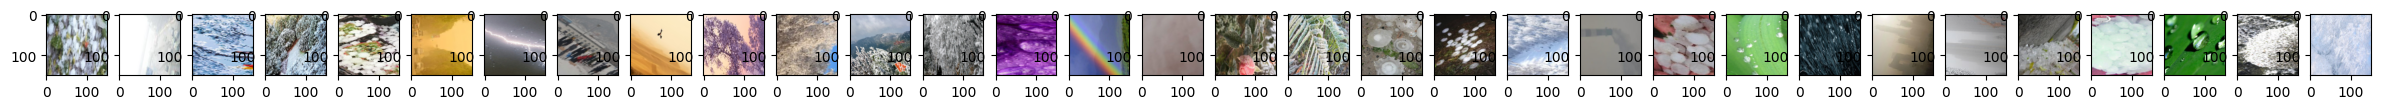

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = "categorical",
    # Guardar imágenes generadas
    # save_to_dir = "augmented",
    # save_prefix = "aug",
    # save_format = "jpg"
)

images, labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()

f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]):
  axarr[i].imshow(images[i])

# Re-escalado de las imágenes de las separaciones originales

In [6]:
train_image_rescale = ImageDataGenerator(rescale=1./255)
train_rescale_generator = train_image_rescale.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical"
)

val_image_rescale = ImageDataGenerator(rescale=1./255)
val_rescale_generator = val_image_rescale.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical"
)

test_image_rescale = ImageDataGenerator(rescale=1./255)
test_rescale_generator = test_image_rescale.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical"
)

Found 4113 images belonging to 11 classes.
Found 1369 images belonging to 11 classes.
Found 1380 images belonging to 11 classes.


# Implementación del modelo

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import Sequential

img_shape = (150, 150, 3)

# Arquitectura del modelo
model = Sequential()
model.add(
    Conv2D(32, (3, 3), activation='relu', kernel_constraint=max_norm(3), input_shape=img_shape)
)
model.add(MaxPooling2D((2, 2)))
model.add(
    Conv2D(64, (3, 3), activation='relu', kernel_constraint=max_norm(3))
)
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(
    Conv2D(128, (3, 3), activation='relu', kernel_constraint=max_norm(3))
)
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax'))

model.summary()

# Compilación del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\Migue\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,039,307 (72.63 MB)

 Trainable params: 19,039,307 (72.63 MB)

 Non-trainable params: 0 (0.00 B)

# Entrenamiento del modelo (stage 1): sin usar data augmentation

In [9]:
epochs = 30

history = model.fit(train_rescale_generator, epochs=epochs, validation_data=val_rescale_generator)
model.save("my_model_1.keras")
model.save("my_model_1.h5")

Epoch 1/30


C:\Users\Migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


129/129 ━━━━━━━━━━━━━━━━━━━━ 118s 889ms/step - accuracy: 0.2458 - loss: 0.3512 - val_accuracy: 0.5822 - val_loss: 0.1845
Epoch 2/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 56s 426ms/step - accuracy: 0.5582 - loss: 0.1896 - val_accuracy: 0.6421 - val_loss: 0.1553
Epoch 3/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 52s 401ms/step - accuracy: 0.6478 - loss: 0.1602 - val_accuracy: 0.6669 - val_loss: 0.1527
Epoch 4/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 57s 437ms/step - accuracy: 0.6715 - loss: 0.1454 - val_accuracy: 0.6852 - val_loss: 0.1348
Epoch 5/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 59s 449ms/step - accuracy: 0.7217 - loss: 0.1300 - val_accuracy: 0.7071 - val_loss: 0.1343
Epoch 6/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 53s 409ms/step - accuracy: 0.7389 - loss: 0.1189 - val_accuracy: 0.6969 - val_loss: 0.1387
Epoch 7/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 57s 437ms/step - accuracy: 0.7955 - loss: 0.1001 - val_accuracy: 0.7268 - val_loss: 0.1266
Epoch 8/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 53s 408ms/step - accuracy: 0.8410 - loss: 0.0852 - va

## Evaluación del modelo base (stage 1): Sin usar data augmentation

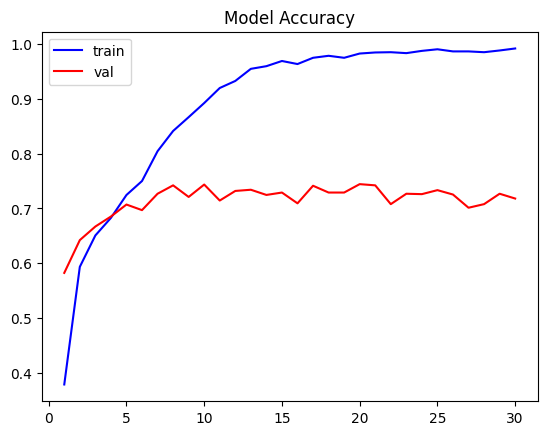

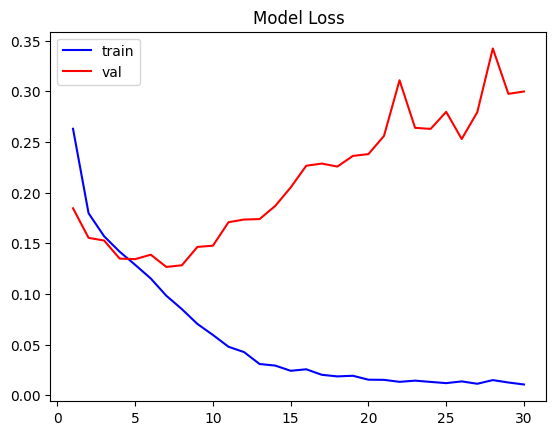

In [10]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

num_epochs = range(1, len(train_acc) + 1)

plt.plot(num_epochs, train_acc,'b', label='train')
plt.plot(num_epochs, val_acc,'r', label='val')
plt.title('Model Accuracy')
plt.legend()

plt.figure()

plt.plot(num_epochs, train_loss,'b', label='train')
plt.plot(num_epochs, val_loss,'r', label='val')
plt.title('Model Loss')
plt.legend()


# Probar el modelo (stage 1): Sin usar data augmentation

43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.7270 - loss: 0.2949
stage 1 test accuracy: 0.7202034592628479
stage 1 test loss: 0.29692813754081726
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━

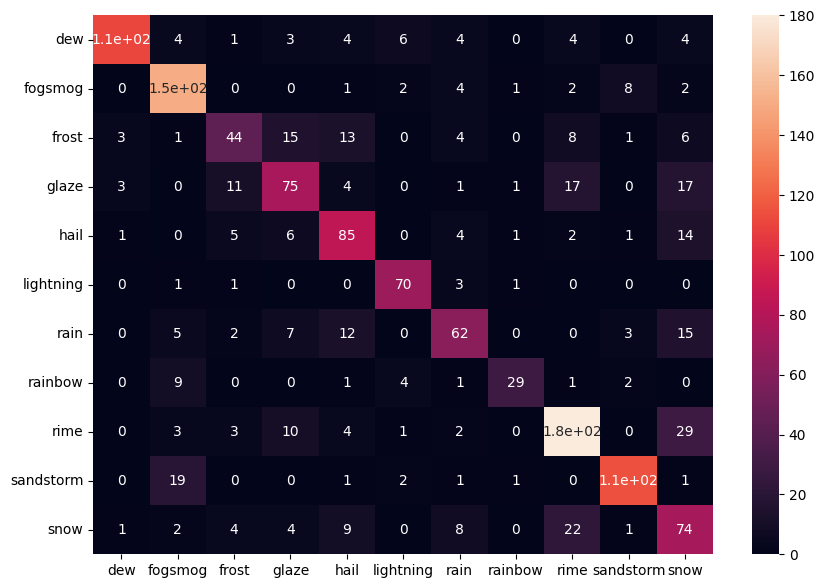

In [12]:
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn

class_names = list(test_rescale_generator.class_indices.keys())

model = load_model("../my_model_1.keras")

#steps = número de archivos / tamaño del batch
test_loss_1, test_acc_1 = model.evaluate(test_rescale_generator, steps=43)

print("stage 1 test accuracy:", test_acc_1)
print("stage 1 test loss:", test_loss_1)

# Matriz de confusión
predicted_labels = []
original_labels = []

for i in range(len(test_rescale_generator)):
    batch = test_rescale_generator[i]
    images, labels = batch
    predictions = model.predict(images)
    
    batch_predicted_labels = np.argmax(predictions, axis=1)
    labels = np.argmax(labels, axis=1)
    
    predicted_labels.extend(batch_predicted_labels)
    
    original_labels.extend(labels)

predicted_labels = np.array(predicted_labels)
original_labels = np.array(original_labels)

conf_mat = confusion_matrix(original_labels, predicted_labels)

df_cm = pd.DataFrame(conf_mat, index = [i for i in class_names],
                  columns = [i for i in class_names])
plt.figure(figsize = (10,7))

print("Matriz de confusión")
sn.heatmap(df_cm, annot=True)

print("Reporte de clasificación")
print(classification_report(original_labels, predicted_labels, target_names=class_names))


# Entrenamiento del modelo (stage 2): con data augmentation

In [13]:
epochs = 100

history_2 = model.fit(train_generator, epochs=epochs, validation_data=val_rescale_generator)


Epoch 1/100


c:\Users\Migue\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 311ms/step - accuracy: 0.4887 - loss: 0.2754 - val_accuracy: 0.6311 - val_loss: 0.1668
Epoch 2/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 45s 333ms/step - accuracy: 0.5545 - loss: 0.1923 - val_accuracy: 0.6939 - val_loss: 0.1423
Epoch 3/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 44s 333ms/step - accuracy: 0.5982 - loss: 0.1778 - val_accuracy: 0.6947 - val_loss: 0.1384
Epoch 4/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 47s 351ms/step - accuracy: 0.5983 - loss: 0.1701 - val_accuracy: 0.6917 - val_loss: 0.1392
Epoch 5/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 46s 343ms/step - accuracy: 0.6052 - loss: 0.1657 - val_accuracy: 0.6779 - val_loss: 0.1435
Epoch 6/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 45s 337ms/step - accuracy: 0.6129 - loss: 0.1627 - val_accuracy: 0.6961 - val_loss: 0.1296
Epoch 7/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 47s 352ms/step - accuracy: 0.6520 - loss: 0.1538 - val_accuracy: 0.7115 - val_loss: 0.1316
Epoch 8/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 45s 334ms/step - accuracy: 0.6377 - loss: 0.156

## Evaluación del modelo base (stage 2): Con data augmentation

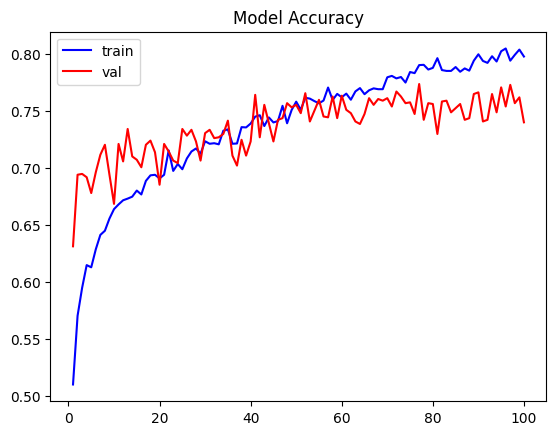

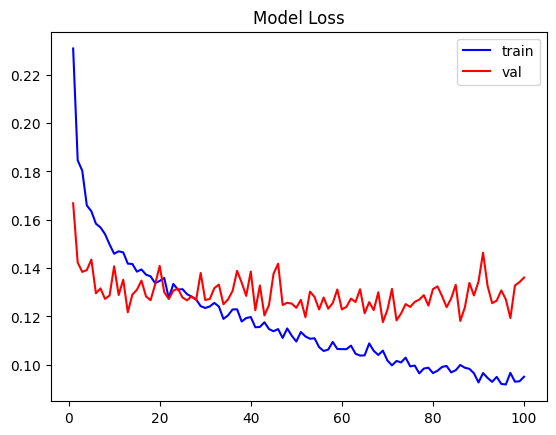

In [15]:
# model.save("my_model.h5")
# model.save("my_model.keras")

train_acc = history_2.history['accuracy']
train_loss = history_2.history['loss']

val_acc = history_2.history['val_accuracy']
val_loss = history_2.history['val_loss']

num_epochs = range(1, len(train_acc) + 1)

plt.plot(num_epochs, train_acc,'b', label='train')
plt.plot(num_epochs, val_acc,'r', label='val')
plt.title('Model Accuracy')
plt.legend()

plt.figure()

plt.plot(num_epochs, train_loss,'b', label='train')
plt.plot(num_epochs, val_loss,'r', label='val')
plt.title('Model Loss')
plt.legend()

# Probar el modelo (stage 2)

c:\Users\Migue\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.7527 - loss: 0.1302
stage 2 test accuracy: 0.7587209343910217
stage 2 test loss: 0.1273490935564041
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━

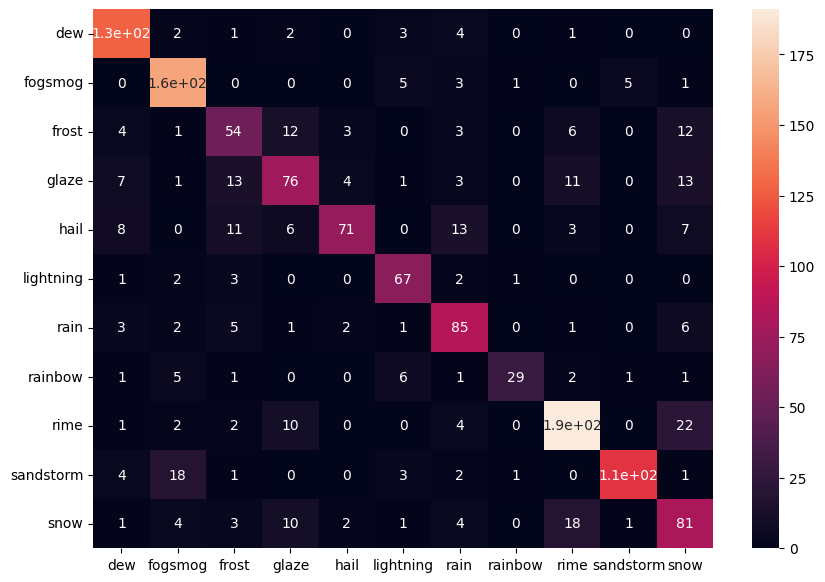

In [13]:
model = load_model("../my_model_2.keras")

#steps = número de archivos / tamaño del batch
test_loss_2, test_acc_2 = model.evaluate(test_rescale_generator, steps=43)

print("stage 2 test accuracy:", test_acc_2)
print("stage 2 test loss:", test_loss_2)

# Matriz de confusión
predicted_labels = []
original_labels = []

for i in range(len(test_rescale_generator)):
    batch = test_rescale_generator[i]
    images, labels = batch
    predictions = model.predict(images)
    
    batch_predicted_labels = np.argmax(predictions, axis=1)
    labels = np.argmax(labels, axis=1)
    
    predicted_labels.extend(batch_predicted_labels)
    
    original_labels.extend(labels)

predicted_labels = np.array(predicted_labels)
original_labels = np.array(original_labels)


conf_mat = confusion_matrix(original_labels, predicted_labels)

df_cm = pd.DataFrame(conf_mat, index = [i for i in class_names],
                  columns = [i for i in class_names])
plt.figure(figsize = (10,7))

print("Matriz de confusión")
sn.heatmap(df_cm, annot=True)

# Reporte de clasificación
print("Reporte de clasificación")
print(classification_report(original_labels, predicted_labels, target_names=class_names))


# Implementación de modelo con Transfer Learning

In [8]:
from keras.applications import vgg16

vgg = vgg16.VGG16(include_top=False, weights="imagenet", input_shape=img_shape)
vgg.trainable = False

tl_model = Sequential()
tl_model.add(vgg)
tl_model.add(Flatten())
tl_model.add(Dense(512, activation='relu'))
tl_model.add(Dropout(0.5))
tl_model.add(Dense(11, activation='softmax'))

tl_model.summary()

tl_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

# Entrenamiento del modelo (stage 3): con data augmentation

In [9]:
epochs = 20

history_3 = tl_model.fit(train_generator, epochs=epochs, validation_data=val_rescale_generator)
model.save("my_model_3.keras")
model.save("my_model_3.h5")

Epoch 1/20


c:\Users\Migue\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


129/129 ━━━━━━━━━━━━━━━━━━━━ 187s 1s/step - accuracy: 0.3370 - loss: 0.3270 - val_accuracy: 0.6267 - val_loss: 0.1699
Epoch 2/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.5663 - loss: 0.1852 - val_accuracy: 0.6633 - val_loss: 0.1522
Epoch 3/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 298s 2s/step - accuracy: 0.6039 - loss: 0.1682 - val_accuracy: 0.6822 - val_loss: 0.1436
Epoch 4/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.6149 - loss: 0.1684 - val_accuracy: 0.6917 - val_loss: 0.1396
Epoch 5/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - accuracy: 0.6478 - loss: 0.1532 - val_accuracy: 0.7159 - val_loss: 0.1285
Epoch 6/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 293s 2s/step - accuracy: 0.6544 - loss: 0.1504 - val_accuracy: 0.7166 - val_loss: 0.1262
Epoch 7/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 293s 2s/step - accuracy: 0.6629 - loss: 0.1470 - val_accuracy: 0.7107 - val_loss: 0.1263
Epoch 8/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - accuracy: 0.6676 - loss: 0.1459 - val_accuracy: 0.717

## Evaluación del modelo base (stage 3): Con data augmentation


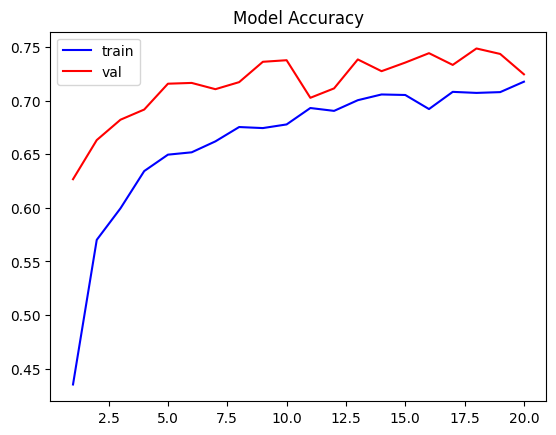

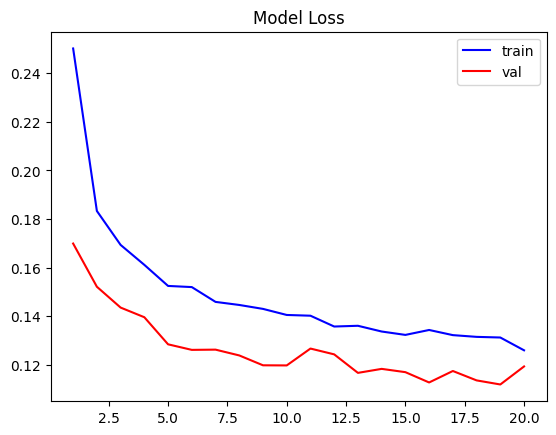

In [10]:
train_acc = history_3.history['accuracy']
train_loss = history_3.history['loss']

val_acc = history_3.history['val_accuracy']
val_loss = history_3.history['val_loss']

num_epochs = range(1, len(train_acc) + 1)

plt.plot(num_epochs, train_acc,'b', label='train')
plt.plot(num_epochs, val_acc,'r', label='val')
plt.title('Model Accuracy')
plt.legend()

plt.figure()

plt.plot(num_epochs, train_loss,'b', label='train')
plt.plot(num_epochs, val_loss,'r', label='val')
plt.title('Model Loss')
plt.legend()

# Probar el modelo (stage 3)

43/43 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.7848 - loss: 0.1027 
stage 3 test accuracy: 0.7630813717842102
stage 3 test loss: 0.11275377869606018
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━

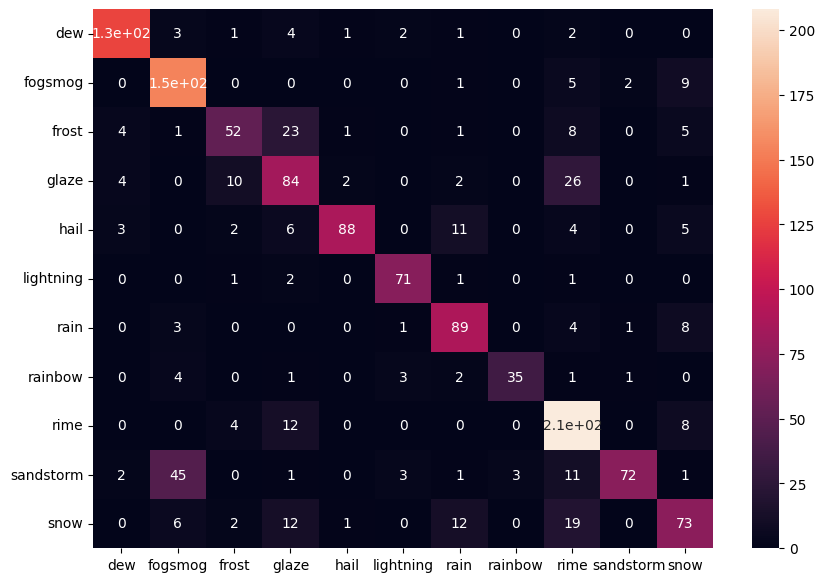

In [13]:
# tl_model = load_model("../my_model_3.keras")

#steps = número de archivos / tamaño del batch
test_loss_3, test_acc_3 = tl_model.evaluate(test_rescale_generator, steps=43)

print("stage 3 test accuracy:", test_acc_3)
print("stage 3 test loss:", test_loss_3)

# Matriz de confusión
predicted_labels = []
original_labels = []

for i in range(len(test_rescale_generator)):
    batch = test_rescale_generator[i]
    images, labels = batch
    predictions = tl_model.predict(images)
    
    batch_predicted_labels = np.argmax(predictions, axis=1)
    labels = np.argmax(labels, axis=1)
    
    predicted_labels.extend(batch_predicted_labels)
    
    original_labels.extend(labels)

predicted_labels = np.array(predicted_labels)
original_labels = np.array(original_labels)


conf_mat = confusion_matrix(original_labels, predicted_labels)

df_cm = pd.DataFrame(conf_mat, index = [i for i in class_names],
                  columns = [i for i in class_names])
plt.figure(figsize = (10,7))

print("Matriz de confusión")
sn.heatmap(df_cm, annot=True)

# Reporte de clasificación
print("Reporte de clasificación")
print(classification_report(original_labels, predicted_labels, target_names=class_names))